<a href="https://www.kaggle.com/code/smujtabahussain/activation-and-loss-functions?scriptVersionId=281487713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook 3: Activation & Loss Functions Visualized

This notebook explores the "components" of a neural network.
1.  **Activation Functions:** Visualizing Sigmoid, Tanh, and ReLU to understand why ReLU is preferred.
2.  **Loss Functions:** Implementing MSE and Cross-Entropy to see how they calculate "error."

## 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A range of input values (z) from -10 to 10
z = np.linspace(-10, 10, 100)

## 2. Activation Functions

We will define Sigmoid, Tanh, and ReLU, along with their derivatives.
**Why derivatives?** Because Backpropagation uses the derivative. If the derivative is 0, learning stops.

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0,x)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Calculate values
y_sigmoid = sigmoid(z)
dy_sigmoid = sigmoid_derivative(z)

y_tanh = tanh(z)
dy_tanh = tanh_derivative(z)

y_relu = relu(z)
dy_relu = relu_derivative(z)

## 3. Visualizing the "Vanishing Gradient"

Look at the **dashed lines** (derivatives) in the plots below.
* **Sigmoid/Tanh:** The derivative is near zero at both ends. This causes gradients to vanish in deep networks.
* **ReLU:** The derivative is exactly 1 for all positive values. It does not vanish!

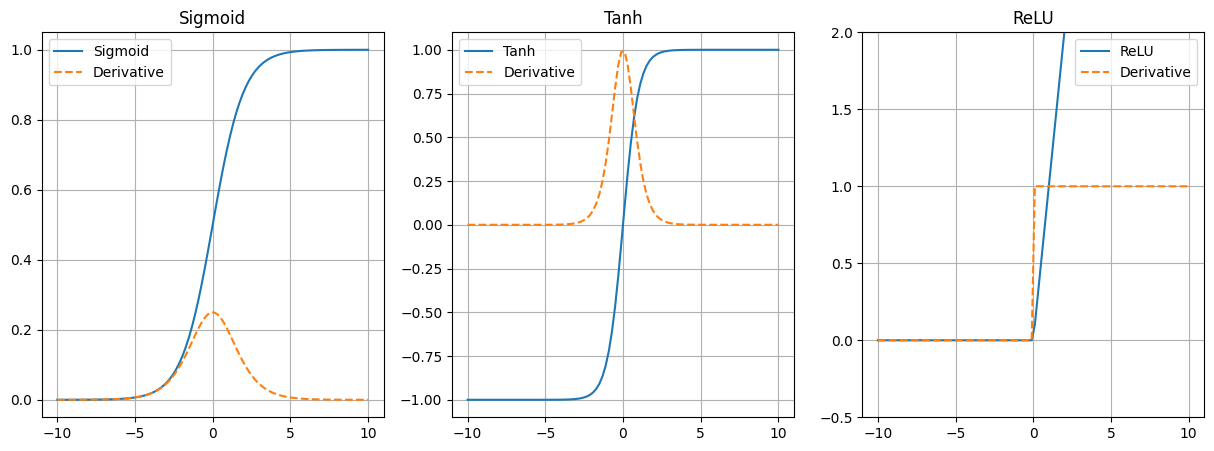

In [3]:
plt.figure(figsize=(15, 5))

# Plot Sigmoid
plt.subplot(1, 3, 1)
plt.plot(z, y_sigmoid, label='Sigmoid')
plt.plot(z, dy_sigmoid, label='Derivative', linestyle='--')
plt.title('Sigmoid')
plt.legend()
plt.grid(True)

# Plot Tanh
plt.subplot(1, 3, 2)
plt.plot(z, y_tanh, label='Tanh')
plt.plot(z, dy_tanh, label='Derivative', linestyle='--')
plt.title('Tanh')
plt.legend()
plt.grid(True)

# Plot ReLU
plt.subplot(1, 3, 3)
plt.plot(z, y_relu, label='ReLU')
plt.plot(z, dy_relu, label='Derivative', linestyle='--')
plt.title('ReLU')
plt.ylim(-0.5, 2) # Limit y-axis to see clearly
plt.legend()
plt.grid(True)

plt.show()

## 4. Loss Functions

Let's manually calculate loss for a simple example to see the math in action.

In [4]:
# Example:
# True Label: 1 (e.g., "Is Dog")
# Model Prediction: 0.1 (Model says "10% chance it's a Dog" -> Wrong!)
y_true = np.array([1])
y_pred_bad = np.array([0.1]) 
y_pred_good = np.array([0.9])

def mse_loss(y, y_hat):
    return np.mean((y - y_hat)**2)

def binary_cross_entropy(y, y_hat):
    # Add a tiny epsilon to avoid log(0) error
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

print("--- Mean Squared Error (MSE) ---")
print(f"Bad Prediction Loss:  {mse_loss(y_true, y_pred_bad):.4f}")
print(f"Good Prediction Loss: {mse_loss(y_true, y_pred_good):.4f}")

print("\n--- Binary Cross-Entropy (Log Loss) ---")
print(f"Bad Prediction Loss:  {binary_cross_entropy(y_true, y_pred_bad):.4f}")
print(f"Good Prediction Loss: {binary_cross_entropy(y_true, y_pred_good):.4f}")

--- Mean Squared Error (MSE) ---
Bad Prediction Loss:  0.8100
Good Prediction Loss: 0.0100

--- Binary Cross-Entropy (Log Loss) ---
Bad Prediction Loss:  2.3026
Good Prediction Loss: 0.1054


**Observation:**
Notice that **Cross-Entropy** gives a much higher penalty (2.30) for the bad prediction compared to MSE (0.81).
This is why Cross-Entropy is preferred for classification—it yells louder when the model is confidently wrong!